# 活性化関数
パーセプトロンのときに用いた活性化関数はステップ関数\
ニューラルネットワークでよく使用される活性化関数の紹介をしていく\
その前に一応ステップ関数の可視化

In [54]:
import functions as func#坂西君が作ったfunctions.pyをimport
import numpy as np
import matplotlib.pylab as plt

## ステップ関数
$$
    step(x)=
        \begin{cases}
            1 \quad x > 0 \\
            0 \quad x \leqq 0\\
        \end{cases}
$$

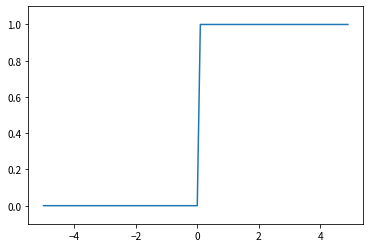

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = func.step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## シグモイド関数
$$
σ(x)=\frac{1}{1+\exp(-x)}
$$

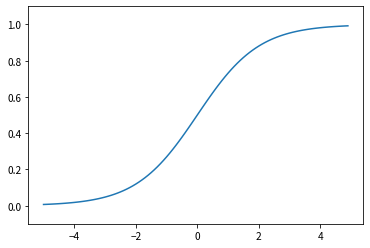

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = func.sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## ReLU関数
$$
    ReLU(x)=
        \begin{cases}
            x \quad x > 0 \\
            0 \quad x \leqq 0\\
        \end{cases}
$$

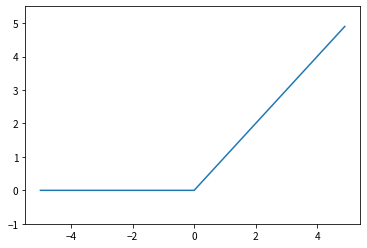

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = func.relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

この後はシグモイド関数を使っていくが,この本の後半は主にReLU関数を使用する

## 多次元配列の復習
ニューラルネットワークの実装の前に多次元配列の復習

np.array([[1,2], [3,4], [5,6]])は次のような行列と考えて良い
$$
   \boldsymbol{M} = 
       \begin{pmatrix}
           1&2\\
           3&4\\
           5&6\\
       \end{pmatrix} \quad
$$

また行列$\boldsymbol{A}$と$\boldsymbol{B}$の内積はnp.dot(A, B)で計算できる

In [12]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(A.shape)
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


## 3層ニューラルネットワークの実装
具体例を用いて実際にやってみる\
活性化関数にはシグモイド関数を使う\
各入力とパラメータの値は適当

In [16]:
def init_network(): #変数の初期化
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])   #0層から1層への重み
    network["b1"] = np.array([0.1, 0.2, 0.3])                      #0層から1層へのバイアス
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #1層から2層への重み
    network["b2"] = np.array([0.1,0.2])                            #1層から2層へのバイアス
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])             #2層から3層への重み
    network["b3"] = np.array([0.1, 0.2])                           #2層から3層へのバイアス
    
    return network

def forward(network, x): #内積＋バイアスの計算
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = func.sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = func.sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = func.identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


なんとなくできてるっぽい

## 出力層の設計
ニューラルネットワークは分類問題と回帰問題のどちらにも対応しているが、一般的には回帰問題で恒等関数を、分類問題ではソフトマックス関数を使う。\
上の例では恒等関数identity_functionを使っている

## ソフトマックス関数
$$
    y_k = 
        \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} \quad
$$

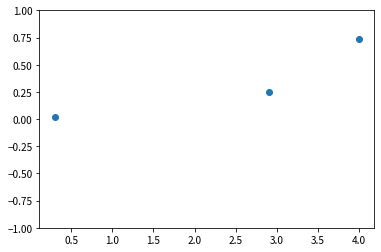

1.0


In [55]:
x = np.array([0.3, 2.9, 4.0])
y = func.softmax(x)
plt.scatter(x, y)
plt.ylim(-1.0, 1.0)
plt.show()

print(np.sum(y))

定義からわかるように、yの総和1であるため、確率関数と見ることができる。\
分類問題では一番値の大きい、つまり確率の高いクラスを出力結果とする。\
図や定義から、入力xと出力yの大小関係は変化しないため、テストデータで分類を行う際にはソフトマックス関数は省略できる。\
ソフトマックス関数を使うのはテスト時ではなく学習時で、詳しくは4章を参照。

## 手書き数字認識
ニューラルネットワークの大まかな仕組みを学んだところで、実践的な問題に取り組む。\
今回は学習済みパラメータを使って、クラス分類のテストだけを行う。

In [38]:
#テストデータの準備
from mnist import load_mnist 
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

In [40]:
#データの形状を確かめる
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [46]:
#画像も表示させてみる
from PIL import Image
from IPython.display import display #Jupyter上で表示するのに必要

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    display(pil_img)
    
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


## ニューラルネットワークの推論処理
データのダウンロードが正常にできたようなので、推論処理を行う。\
入力層は28^2で784、出力層は10のニューロンを構成する。\
先程のように3層ニューラルネットワークで、1層は50、2層は100のニューロンからなる。

In [52]:
import pickle

def get_data(): #データの取得
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network(): #sample_weight.pklから学習済みのパラメータを持ってくる
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x): #計算する
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = func.sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = func.sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = func.softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0 #推論が正しければ1カウントする変数を用意
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) #正解数をデータ数で割る

Accuracy:0.9352


とりあえず学習済みパラメータを使っての推論処理は成功。\
これからはネットワークの構造や学習方法の工夫で99%を超えるようになるらしい。

## バッジ処理
最後にバッジ処理について少し言及する
### バッジ処理
データ処理の際に、入力をまとまり(バッジ)に区切って処理すること。\
数値計算を扱うライブラリの多くが配列の大きい計算を効率良くできるように最適化されているため、一度に大きな配列を計算するほうが早く処理が終わる。\
先の例ではデータ長 = 60000回もの計算をしていた。

In [53]:
#バッジ処理を実装してみる
x, t = get_data()
network = init_network()

batch_size = 100 #1バッジ何個か(バッジサイズ)
accuracy_cnt = 0

for i in range(0, len(x), batch_size): #0からlen(x)-1までをbatch_sizeごとにループ
    x_batch = x[i:i+batch_size] #batch_size = 100ごとにスライス
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1) #axis = 1 は行ごとにmaxを取ってという意味
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Acccuracy:" + str(float(accuracy_cnt) / len(x)))

Acccuracy:0.9352


先程の答えと一致しているかつ、若干処理が速くなった。大成功。